# Week 1 Exercise 1

The aims of this exercise are: 
    
    - to gain experience in visualising the behaviour of a simple algorithm 
    
    - to solve a simple data-fitting problem by gradient descent
    
    - to see some of the pathologies of gradient descent in the visualisation, and to try out alternative
    optimisation methods that correct them (challenge 8 at the end). 

In [1]:
import numpy as np
import math     # these commands allow us to use functions in the numpy and math modules

## Creating vectors and matrices

In [2]:
d = [1, 2, 7.5, 3, -1, 4]

What type is d? 

In [3]:
type(d)

list

list is a core Python type which is not implemented as an array. To make an efficient numpy array, we need to use numpy commands. The most basic one is `array`

In [4]:
a = np.array([2,3, 7, -23.2])
a

array([  2. ,   3. ,   7. , -23.2])

In [5]:
type(a)

numpy.ndarray

We can also make numpy arrays by generation arrays directly full of random numbers, or zeros

In [6]:
b = np.random.random([3,5]) # uniform random numbers between 0 and 1
b

array([[0.25724559, 0.68162856, 0.83688775, 0.7454396 , 0.75811729],
       [0.36424514, 0.921017  , 0.0152315 , 0.51304311, 0.81449596],
       [0.98067633, 0.07291639, 0.29378477, 0.65526518, 0.10109367]])

Annoyingly, the corresponding function for generating normal random variates has a different syntax ! 
Can anyone find out why? 
Look:

In [7]:
b = np.random.randn(4,2) # normally distributed random numbers with mean 0 and standard deviation 1
b

array([[ 0.69024493,  0.73588865],
       [-2.34552132, -1.1435924 ],
       [ 0.07039718, -0.55776127],
       [ 1.95123723, -0.24763845]])

You can get documentation and help on a function by typing a question mark in front of it: 

In [8]:
?np.random.randn

`np.zeros` has the same syntax as `np.random.random`

In [9]:
b = np.zeros([3,2])
b

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

## Visualising arrays and vectors

In mathematical programming, you calculate large arrays of numbers. The only way of knowing what is going on is to visualise these arrays.

There are two functions I use more frequently than any otherss: `imshow` and `plot`, both of which are in the `matplotlib.pyplot` module, which must be imported

In [10]:
import matplotlib.pyplot as plt  # it is more convenient to type plt than matplotlib.pyplot every time

# the following 'magic' instruction makes the plots appear in the notebook itself
%matplotlib inline  

### imshow : plotting a matrix as a colormap

In [11]:
a = np.random.random([2,3])
a

array([[0.31341499, 0.57005668, 0.27009012],
       [0.74441953, 0.62704666, 0.11634088]])

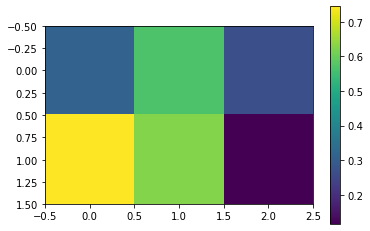

In [12]:
plt.imshow(a)
plt.colorbar()

imshow( <matrix> )   # this shows the matrix as a colormap. Useful for seeing what is in the matrix
colorbar()           # puts a colour scale to one side of the matrix, so that you can see what the values are. 

In [13]:
v = np.cumsum( np.array( [1,2,3,17,-6])) # cumsum is used just to get a better looking curve

In [14]:
v

array([ 1,  3,  6, 23, 17])

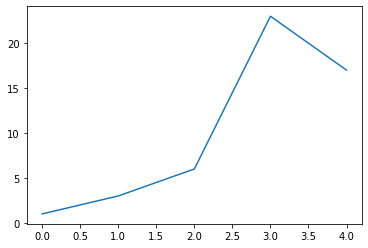

In [15]:
plt.plot( v )

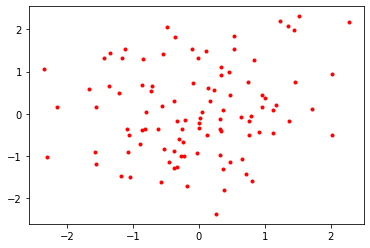

In [16]:
x = np.random.randn(100,1)
y = np.random.randn(100,1)

plt.plot(x,y,'r.') # red dots

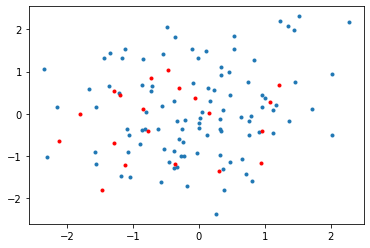

In [17]:
plt.plot(x,y,'.')
u = np.random.randn(20,1)
v = np.random.randn(20,1)
plt.plot(u,v,'r.')

Note that the plot above is plot on top of another

In [18]:
math.sqrt( np.mean(a * a) )

0.49278551567814727

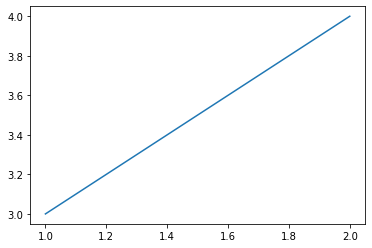

In [19]:
plt.plot([1,2],[3,4])

# Finding a line of best fit by gradient descent

First we define some (synthetic) data to work with, consisting of x values and y values

In [20]:
x_data = np.array( [x for x in range(0,10)])
x_data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
y_data = 1.1 + 0.6 * x_data +  np.random.randn(x_data.size)

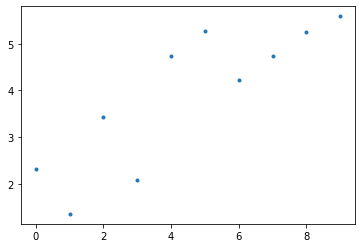

In [22]:
plt.plot(x_data,y_data,'.')

We have data $(x_1, y_1), \ldots, (x_n, y_n)$

Now we want to find the line of best fit.  How do we define a line? 

$\hat{y} = m x + c$

We put the hat over $y$ to show it is a prediction, not the data value. 

There are two parameters to find: $m$ and $c$

Next, what is "best fit"?

Given parameter values $m$ and $c$, our prediction of $y_i$ is

$\hat{y}_i = m x_i + c$

We use mean squared prediction error as the measure of goodness of fit. 

$J = \frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i)^2$

Let us create a function that calculates $J$ from $x$, $y$, $m$, and $c$

In [23]:
def calculate_J(x,y,m,c):
    """
    x, y are ndarrays of the same length
    m and c are floating point numbers giving gradient and intercept of a line
    """
    yhat  = m * x + c
    errs = (yhat - y)**2
    J = np.mean( errs )
    return J

In [24]:
m_values = np.linspace(0,1,200)
c_values = np.linspace(0,2,200)

We want to visualise J as a function of m and c, for given data point with values x and y 

We do this with a colormap

In [25]:
J_grid = np.zeros([m_values.size,c_values.size])

for m_index in range(0,m_values.size):
    for c_index in range(0,c_values.size):
        J_grid[m_index,c_index] = calculate_J(x_data, y_data, m_values[m_index], c_values[c_index] )    

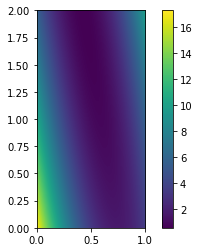

In [26]:
plt.imshow(J_grid.transpose(), origin='lower',extent=[0,1,0,2])
plt.colorbar()

The x-axis corresponds to values of m; the y-axis corresponds to values of c. 

The colour shows the value of J for each combination of values of m and c. 

This colour map is a little hard to read. We are interested in the position of the p

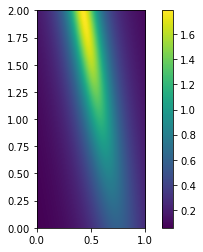

In [27]:
plt.imshow(1. / J_grid.transpose(), origin='lower',extent=[0,1,0,2])
plt.colorbar()

In [28]:
def J_gradient(x,y,m,c):
    """
    x, y are ndarrays of the same length
    m and c are floating point numbers giving gradient and intercept of a line
    
    Returns the gradient J with respect to 
    """
    yhat = m*x + c 
    c_grads = 2 * (yhat - y)
    m_grads = 2 * (yhat - y) * x
    # now take the means of these, since J is the mean of the square error
    c_grad = np.mean( c_grads )
    m_grad = np.mean( m_grads )
    return (m_grad, c_grad)

In [29]:
J_gradient(x_data,y_data,0,0)

(-42.12308943637016, -7.800423243477917)

In [30]:
J_gradient(x_data,y_data, 0.6, 1.1)

(1.976910563629843, -0.200423243477916)

Now let us try to optimise by gradient descent

In [38]:
m = 0.0
c = 0.0 

m_path = [m]
c_path = [c]

n_iterations = 200
learning_rate = 0.034

for n in range(1,n_iterations):
    m_grad, c_grad = J_gradient(x_data, y_data, m, c )
    m = m - learning_rate * m_grad
    c = c - learning_rate * c_grad
    m_path.append(m)
    c_path.append(c)
    
# at this point you may want to inspect m_path and c_path

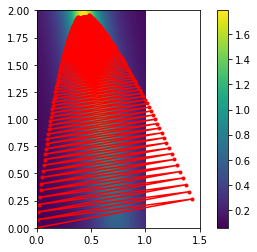

In [39]:
plt.imshow(1. / J_grid.transpose(), origin='lower',extent=[0,1,0,2])
plt.colorbar()
plt.plot(m_path,c_path,'r')
plt.plot(m_path,c_path,'r.')